# AGRICULTURE PRICE PREDICTION

# PROBLEM STATEMENT
**predict price via market wise and commodity wise**

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings(action='ignore')


# Data collection


**We will work with the Agriculture prices dataset which was provided by the company.  It has Timestamp,State,District,marketcommodity,variety,arrival_date,min_price,max_price,modal_price**

In [2]:
data=pd.read_csv(r"C:\Users\sandeep\OneDrive\Desktop\Internship\Agricultural-Price-Prediction-and-Visualization-on-Android-App-master\total.csv")
data

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...,...,...
7413,1523025127,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,06/04/2018,3700.0,3900.0,3800.0
7414,1523025127,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,06/04/2018,830.0,870.0,850.0
7415,1523025127,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,06/04/2018,3250.0,3350.0,3300.0
7416,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,06/04/2018,3600.0,3800.0,3700.0


## EXPLORATORY DATA ANALYSIS

In [3]:
#PRINTING THE FIRST FIVE ELEMENTS OF THE DATASET
data.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [4]:
data.shape   #checking the shape of the dataset.According to dataset we have 7418 rows and 10 columns

(7418, 10)

In [5]:
data.columns   #How many columns are present in the dataset

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [6]:
data.describe()   #Describes about all the statistical methods for analysis This feature only allows for numerical data present in the dataset

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


# DATA CLEANING
Handling  missing values, removing duplicates, and correct inconsistent data

In [7]:
data.isnull().sum()   #Checking the missing values in the dataset

timestamp       0
state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [8]:
data['state'].value_counts()

Uttar Pradesh       2343
Kerala               970
Maharashtra          676
Punjab               599
Karnataka            421
Gujarat              342
West Bengal          302
Haryana              279
Orissa               257
Telangana            245
Himachal Pradesh     239
Tamil Nadu           184
Jharkhand            130
Madhya Pradesh       123
Rajasthan            104
Uttrakhand            71
NCT of Delhi          36
Tripura               33
Chattisgarh           23
Assam                 21
Meghalaya             12
Pondicherry            8
Name: state, dtype: int64

In [9]:
data['district'].value_counts()

Agra         139
Kottayam     137
Palakad      136
Ernakulam    124
Alappuzha    120
            ... 
Sagar          1
Koppal         1
Shravasti      1
Belgaum        1
Satna          1
Name: district, Length: 348, dtype: int64

In [10]:
data['market'].value_counts()

Thodupuzha       59
Vadakkenchery    51
Palakkad         51
Pune             50
Aligarh          42
                 ..
Thalaivasal       1
Nidamanoor        1
Omalur            1
Konganapuram      1
Kothagudem        1
Name: market, Length: 990, dtype: int64

In [11]:
data['commodity'].value_counts()

Potato                  383
Onion                   353
Tomato                  340
Brinjal                 312
Wheat                   281
                       ... 
Cornation                 1
Gladiolus Cut Flower      1
Jaffri                    1
Jarbara                   1
Moath Dal                 1
Name: commodity, Length: 192, dtype: int64

# DATA VISUALIZATION

In [12]:
#correlation among the data
data.corr()

,timestamp,min_price,max_price,modal_price
timestamp,1.000000,-0.135984,-0.172347,-0.156164
min_price,-0.135984,1.000000,0.961513,0.979472
max_price,-0.172347,0.961513,1.000000,0.992559
modal_price,-0.156164,0.979472,0.992559,1.000000


<AxesSubplot:>

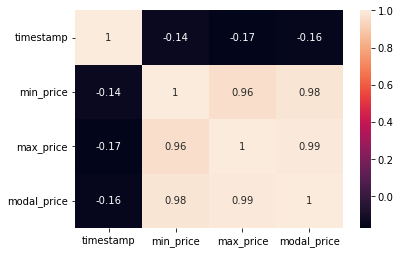

In [13]:
sns.heatmap(data.corr(),annot=True)

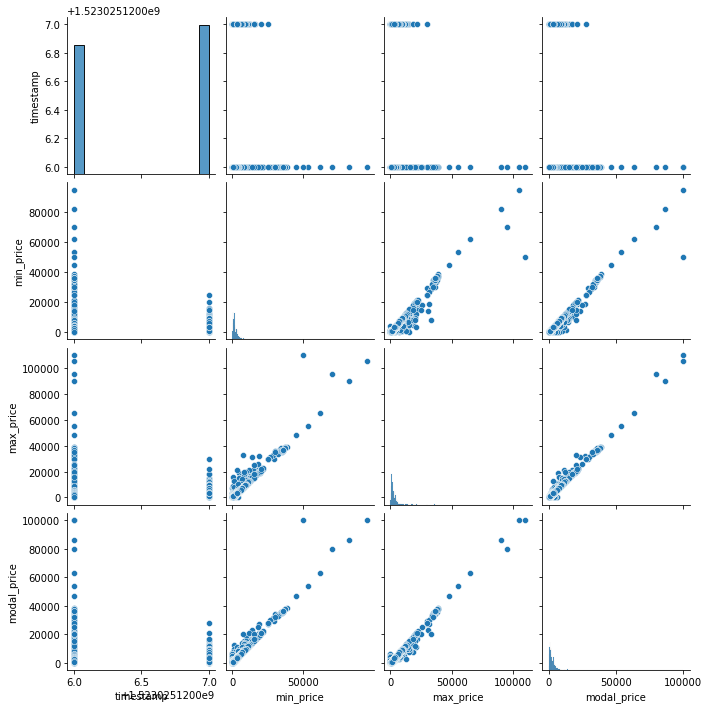

In [14]:
sns.pairplot(data=data)

<AxesSubplot:xlabel='modal_price'>

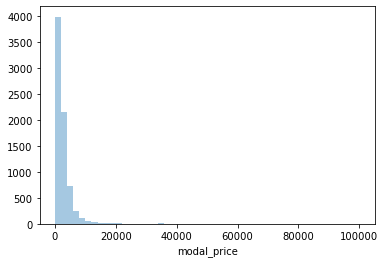

In [15]:
sns.distplot(data['modal_price'],kde=False)

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
data.iplot(kind='scatter',x='min_price',y='max_price',mode='markers')

According to above graph we have visualize the graph of minimun price and maximun price so 

In [19]:
data.iplot(kind='line',x='state',y='commodity',color='blue')

In [20]:
data.iplot(kind='bar',x='state',y='commodity',color='#ADD8E6')

According to above graph we can justify that states such as kerala and uttar pradesh highest cultivation rate when compared to other states.

In [21]:
data.iplot(kind='bar',x='market',y='commodity',color='springgreen')

In [22]:
import plotly.express as px
fig=px.histogram(data,x='modal_price',nbins=10)
fig.show()

In [23]:
fig1=px.scatter_3d(data,x='state',y='market',z='commodity',color='modal_price')
fig1.show()

# DATA TRANSFORMATION
(Transform the data into a suitable format for analysis, such as converting categorical data into numerical data.)

In [24]:
data

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...,...,...
7413,1523025127,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,06/04/2018,3700.0,3900.0,3800.0
7414,1523025127,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,06/04/2018,830.0,870.0,850.0
7415,1523025127,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,06/04/2018,3250.0,3350.0,3300.0
7416,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,06/04/2018,3600.0,3800.0,3700.0


so we need to delete some unusable data from the dataset so as to perform for analysis

In [25]:
data=data.drop(['timestamp','arrival_date'],axis=1)
data

,state,district,market,commodity,variety,min_price,max_price,modal_price
0,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),2800.0,3000.0,2900.0
1,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,3500.0,4000.0,3825.0
2,Assam,Barpeta,Bohorihat,Jute,TD-5,3200.0,3875.0,3825.0
3,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,3400.0,3600.0,3500.0
4,Assam,Barpeta,Bohorihat,Mustard,Mustard,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...
7413,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,3700.0,3900.0,3800.0
7414,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,830.0,870.0,850.0
7415,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,3250.0,3350.0,3300.0
7416,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,3600.0,3800.0,3700.0


### CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

Step-1 checking the categorical columns present in the dataset

Step-2 Arranging them into sequential order

# 5. Data Reduction: 


Reduce the number of features in the data set, either by selecting the most important features or by combining redundant features.

In [26]:
cols=data.drop(['state','district','market','commodity','variety'],axis=1)
cols

,min_price,max_price,modal_price
0,2800.0,3000.0,2900.0
1,3500.0,4000.0,3825.0
2,3200.0,3875.0,3825.0
3,3400.0,3600.0,3500.0
4,3550.0,3650.0,3600.0
...,...,...,...
7413,3700.0,3900.0,3800.0
7414,830.0,870.0,850.0
7415,3250.0,3350.0,3300.0
7416,3600.0,3800.0,3700.0


### Importing Label Encoder to convert the categorical data into numerical data

In [27]:
le=LabelEncoder()
df1=data[['state','district','market','commodity','variety']].apply(LabelEncoder().fit_transform)
df1

,state,district,market,commodity,variety
0,0,36,161,21,52
1,0,36,161,50,86
2,0,36,161,93,312
3,0,36,161,102,207
4,0,36,161,125,221
...,...,...,...,...,...
7413,21,332,385,93,312
7414,21,332,385,146,165
7415,21,332,385,152,237
7416,21,332,761,93,312


In [28]:
data=pd.concat([df1,cols],axis=1)
data

,state,district,market,commodity,variety,min_price,max_price,modal_price
0,0,36,161,21,52,2800.0,3000.0,2900.0
1,0,36,161,50,86,3500.0,4000.0,3825.0
2,0,36,161,93,312,3200.0,3875.0,3825.0
3,0,36,161,102,207,3400.0,3600.0,3500.0
4,0,36,161,125,221,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...
7413,21,332,385,93,312,3700.0,3900.0,3800.0
7414,21,332,385,146,165,830.0,870.0,850.0
7415,21,332,385,152,237,3250.0,3350.0,3300.0
7416,21,332,761,93,312,3600.0,3800.0,3700.0


In [29]:
data

,state,district,market,commodity,variety,min_price,max_price,modal_price
0,0,36,161,21,52,2800.0,3000.0,2900.0
1,0,36,161,50,86,3500.0,4000.0,3825.0
2,0,36,161,93,312,3200.0,3875.0,3825.0
3,0,36,161,102,207,3400.0,3600.0,3500.0
4,0,36,161,125,221,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...
7413,21,332,385,93,312,3700.0,3900.0,3800.0
7414,21,332,385,146,165,830.0,870.0,850.0
7415,21,332,385,152,237,3250.0,3350.0,3300.0
7416,21,332,761,93,312,3600.0,3800.0,3700.0


In [30]:
data.corr()

,state,district,market,commodity,variety,min_price,max_price,modal_price
state,1.000000,-0.101459,-0.082202,0.112467,-0.169791,-0.133998,-0.168733,-0.153162
district,-0.101459,1.000000,0.436814,0.015338,0.069894,0.022573,0.033701,0.028211
market,-0.082202,0.436814,1.000000,-0.004618,0.012962,0.061277,0.068606,0.065369
commodity,0.112467,0.015338,-0.004618,1.000000,0.348252,-0.168562,-0.163193,-0.166776
variety,-0.169791,0.069894,0.012962,0.348252,1.000000,-0.019670,-0.007472,-0.013925
min_price,-0.133998,0.022573,0.061277,-0.168562,-0.019670,1.000000,0.961513,0.979472
max_price,-0.168733,0.033701,0.068606,-0.163193,-0.007472,0.961513,1.000000,0.992559
modal_price,-0.153162,0.028211,0.065369,-0.166776,-0.013925,0.979472,0.992559,1.000000


<AxesSubplot:>

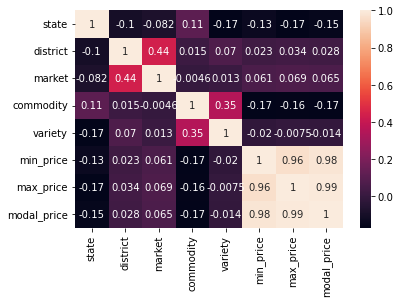

In [31]:
sns.heatmap(data.corr(),annot=True)

# 6. Data Splitting:


Divide the data into training, validation, and testing sets, which are used in different stages of the modeling process.

## Testing and Validation

In [32]:
x=data.iloc[:,:7]
y=data.iloc[:,7:8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

### Applying various algorithms for the model evaluation

#### 1. Linear Regression

In [33]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.coef_

array([[ 3.59148984, -0.05448546, -0.00544936, -0.08461131, -0.03712979,
         0.33881141,  0.65098571]])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [35]:
pred=lr.predict(x_test)
pred

array([[ 653.68491094],
       [7209.8869433 ],
       [5153.02816174],
       ...,
       [2444.16648617],
       [3442.51511145],
       [1515.53441381]])

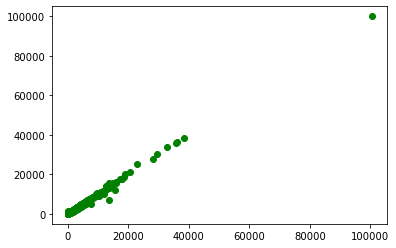

In [36]:
plt.scatter(pred,y_test,color='green')
plt.show()

In [37]:
models = {
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                     Linear Regression": LinearRegression(),
    "                 Ridge (L2) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   K-Nearest Neighbors trained.
                     Linear Regression trained.
                 Ridge (L2) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [38]:
for name, model in models.items():
    print(name + " R^2: {:.5f}".format(model.score(x_test, y_test)*100))

                   K-Nearest Neighbors R^2: 97.33029
                     Linear Regression R^2: 99.53470
                 Ridge (L2) Regression R^2: 99.53470
Support Vector Machine (Linear Kernel) R^2: 99.65024
   Support Vector Machine (RBF Kernel) R^2: 10.17516
                         Decision Tree R^2: 93.15277
                        Neural Network R^2: 99.47818
                         Random Forest R^2: 97.93730
                     Gradient Boosting R^2: 99.26007


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**. 

In [39]:
print(metrics.mean_absolute_error(pred,y_test))

86.33604798833433


In [40]:
print(metrics.mean_squared_error(pred,y_test))

76391.13862222468


In [41]:
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))

276.389469087056


# CONFUSION MATRIX

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
cutoff = 0.7

y_pred_classes = np. zeros_like(pred)
y_pred_classes [pred>cutoff] = 1
y_test_classes = np. zeros_like(pred) 
y_test_classes [y_test > cutoff] = 1

# Now run the confusion matrix as before:

confusion_matrix(y_test_classes, y_pred_classes)



array([[   1,    0],
       [  11, 1472]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.08      1.00      0.15         1
         1.0       1.00      0.99      1.00      1483

    accuracy                           0.99      1484
   macro avg       0.54      1.00      0.58      1484
weighted avg       1.00      0.99      1.00      1484



In [46]:
tn, fp,fn,tp=confusion_matrix(y_test_classes, y_pred_classes).ravel()

# ACCURACY

### accuracy is calculated by (TP + TN) / (TP + TN + FP + FN)

In [47]:
tp+tn/tp+tn+fp+fn

1484.000679347826

# Precision

# Precision is calculated by  TP / (TP + FP)

In [48]:
precision=tp/tp+fp
precision

1.0

# RECALL


 It's calculated as TP / (TP + FN).

In [49]:
recall=tp/tp+fn
recall

12.0

# F1 score

 It's calculated as 2 * (precision * recall) / (precision + recall).

In [50]:
 2 * (precision * recall) / (precision + recall)

1.8461538461538463

# AUC-ROC CURVE

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_classes)
roc_auc = auc(fpr, tpr)
roc_auc

0.9962913014160486

It indicates random Guessing Classifier

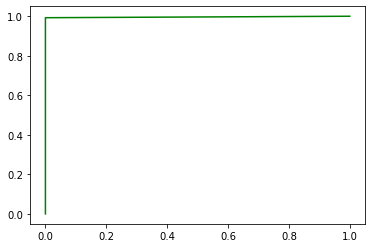

In [52]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green')
plt.show()

In [53]:
import pickle

In [55]:
pickle.dump(lr,open('model.sav','wb'))

In [56]:
prediction=pickle.load(open()'model.sav','rb')

TypeError: load() takes exactly 1 positional argument (2 given)